# Weighted Average Ensemble

Weighted average ensembles assume that some models in the ensemble have more skill than others and give them more contribution when making predictions.

Weighted average or weighted sum ensemble is an ensemble machine learning approach that combines the predictions from multiple models, where the contribution of each model is weighted proportionally to its capability or skill.

The weighted average ensemble is related to the voting ensemble.

Voting ensembles are composed of multiple machine learning models where the predictions from each model are averaged directly. 

For regression, this involves calculating the arithmetic mean of the predictions made by ensemble members. 

For classification, this may involve calculating the statistical mode (most common class label) or similar voting scheme or summing the probabilities predicted for each class and selecting the class with the largest summed probability.

A limitation of the voting ensemble technique is that it assumes that all models in the ensemble are equally effective. This may not be the case as some models may be better than others, especially if different machine learning algorithms are used to train each model ensemble member.

An alternative to voting is to assume that ensemble members are not all equally capable and instead some models are better than others and should be given more votes or more of a seat when making a prediction. This provides the motivation for the weighted sum or weighted average ensemble method.

A weighted average prediction involves first assigning a fixed weight coefficient to each ensemble member. This could be a floating-point value between 0 and 1, representing a percentage of the weight. It could also be an integer starting at 1, representing the number of votes to give each model.

we may have the fixed weights of 0.84, 0.87, 0.75 for the ensemble member. These weights can be used to calculate the weighted average by multiplying each prediction by the model’s weight to give a weighted sum, then dividing the value by the sum of the weights. For example:

   yhat = ((97.2 * 0.84) + (100.0 * 0.87) + (95.8 * 0.75)) / (0.84 + 0.87 + 0.75)
   yhat = (81.648 + 87 + 71.85) / (0.84 + 0.87 + 0.75)
   yhat = 240.498 / 2.46
   yhat = 97.763

The challenging aspect of using a weighted average ensemble is how to choose the relative weighting for each ensemble member.

There are many approaches that can be used. For example, the weights may be chosen based on the skill of each model, such as the classification accuracy or negative error, where large weights mean a better-performing model. Performance may be calculated on the dataset used for training or a holdout dataset, the latter of which may be more relevant.

In this case, we will use the performance of each ensemble model on the training dataset as the relative weighting of the model when making predictions. Performance will be calculated using classification accuracy as a percentage of correct predictions between 0 and 1, with larger values meaning a better model, and in turn, more contribution to the prediction.

An alternate strategy for weighting is to use a ranking to indicate the number of votes that each ensemble has in the weighted average.

For example, the worst-performing model has 1 vote the second-worst 2 votes and the best model 3 votes, in the case of three ensemble members.

# Library

In [1]:
# evaluate a weighted average ensemble for classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

In [3]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import model,scoring

%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [4]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=7)

# split data

In [5]:
# split dataset into train and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.50, random_state=1)

# split the full train set into train and validation sets

In [6]:
# split the full train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.33, random_state=1)

# model classification

In [7]:
model_ensemble, model_weighted_ensemble, model_ranking_ensemble = \
model.voting_ensembles_weighted(X_train_full, y_train_full, X_test, y_test,
                                "soft",'classification')

fit and evaluate each model
>rank 2 -> LR: 87.800
>rank 3 -> DT: 88.420
>rank 1 -> Bayes: 87.300
Weighted Avg Accuracy: 90.700
Voting Accuracy: 90.740
Ranking Weighted Accuracy: 88.400


In [8]:
# make predictions
y_pred = model_weighted_ensemble.predict(X_test)
y_prob = model_weighted_ensemble.predict_proba(X_test)[:,1]

comfusion matrix = 
[[2229  233]
 [ 232 2306]]


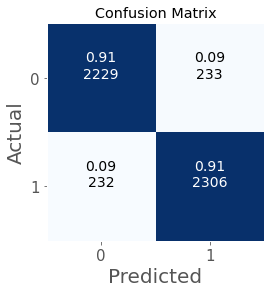


accuracy_score =  0.907
balanced_accuracy_score =  0.907

precision score =  0.9082
average precision score =  0.8716
recall score =  0.9086

F1 score =  0.9084
F2 score =  0.9083
F3 score =  0.9083
F_beta score =  0.9083
Matthews Correlation Coefficient score =  0.814

AUC of Precision-Recall Curve on Testing =  0.9658
Best Threshold for Precision-Recall Curve = 0.462558
F-Score = 0.910
AUC of ROC =  0.9668

Best Threshold for ROC = 0.489342
G-Mean = 0.908
Best Threshold with Youden’s J statistic = 0.489342

Cohens kappa =  0.814
Gini =  0.9316

Expected Approval Rate =  0.5078
Expected Default Rate =  0.0918

classification_report
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2462
           1       0.91      0.91      0.91      2538

    accuracy                           0.91      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.91      0.91      0.91      5000




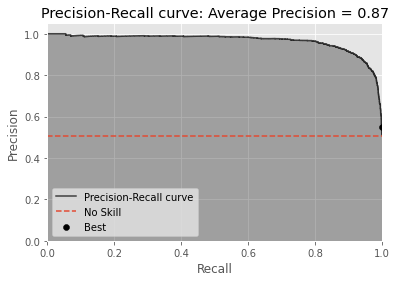

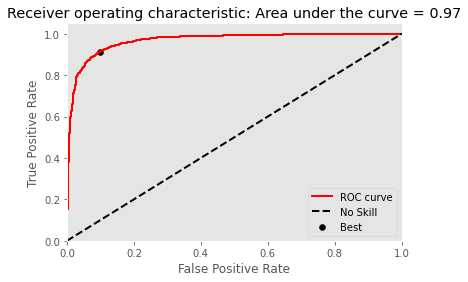


time span=  1


In [9]:
scoring.print_score(y_test,y_pred,y_prob,
                    types='classification',labels=[0,1],time1=1,time2=2)

# model regression

In [10]:
# define dataset
X, y = make_regression(n_samples=10000, n_features=20, n_informative=10, noise=0.3, random_state=7)
# split dataset into train and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.50, random_state=1)
# split the full train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.33, random_state=1)

In [11]:
model_ensemble, model_weighted_ensemble, model_ranking_ensemble = \
model.voting_ensembles_weighted(X_train_full, y_train_full, X_test, y_test,
                                "soft",'regression')

fit and evaluate each model
>rank 3 -> knn: -10016.853
>rank 2 -> cart: -13446.703
>rank 1 -> svm: -13819.499
Weighted Avg MAE: 104.683
Voting MAE: 102.854
Ranking Weighted MAE: 96.631


In [12]:
# make predictions
y_pred = model_weighted_ensemble.predict(X_test)


MAPE      = 22.65 %
R2        = 66.45 %
Mean_AE   = 104.68
Median_AE = 85.94
Mean_SE   = 17924.88
RMAE      = 10.23
RMSE      = 133.88
Max Error = 514.98


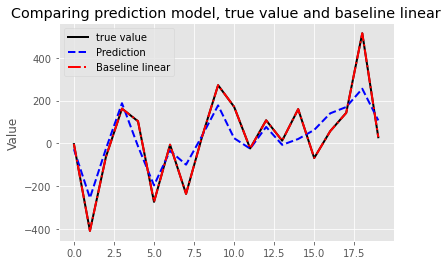


time span=  1


In [24]:
scoring.print_score(y_test,y_pred,y_prob,
                    types='regression',labels=None,time1=1,time2=2,
                    X_train=X_train_full, y_train=y_train_full,X_test=X_test)